10001-12701
10001-12701
10001-12702
10001-12702
10001-12703
10001-12703
10001-12704
10001-12704
10001-12705
10001-12705
10001-1901
10001-1902
10001-3701
10001-3702
10001-3702
10001-3703
10001-3704
10001-3704


/Users/astro/.local/miniconda3/envs/public/lib/python3.7/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/astro/.local/miniconda3/envs/public/lib/python3.7/site-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/Users/astro/.local/miniconda3/envs/public/lib/python3.7/site-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Users/astro/.local/miniconda3/envs/public/lib/python3.7/site-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/Users/astro/.local/miniconda3/envs/public/lib/python3.7/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/astro/.local/miniconda3/envs/public/lib/python3.7/site-packag

10001-6101
10001-6102
10001-6103
10001-6103
10001-6104
10001-6104
10001-9101
10001-9101
10001-9102
10001-9102
10141-12701
10141-12702
10141-12703
10141-12704
10141-12705
10141-1901
10141-1902
10141-3701
10141-3702
10141-3703
10141-3704
10141-6101
10141-6102
10141-6103
10141-6104
10141-9101
10141-9102
10142-12701
10142-12702
10142-12703
10142-12704
10142-12705
10142-1901
10142-1902
10142-3701
10142-3702
10142-3703
10142-3704
10142-6101
10142-6102
10142-6103
10142-6104
10142-9101
10142-9102
10143-12701
10143-12702
10143-12703
10143-12704
10143-12705
10143-1901
10143-1902
10143-3701
10143-3702
10143-3703
10143-3704
10143-6101
10143-6102
10143-6103
10143-6104
10143-9101
10143-9102
10144-12701
10144-12702
10144-12703
10144-12704
10144-12705
10144-1901
10144-1902
10144-3701
10144-3702
10144-3703
10144-3704
10144-6101
10144-6102
10144-6103
10144-6104
10144-9101
10144-9102
10145-12701
10145-12702
10145-12703
10145-12704
10145-12705
10145-1901
10145-1902
10145-3701
10145-3702
10145-3703
10145-3

KeyboardInterrupt: 

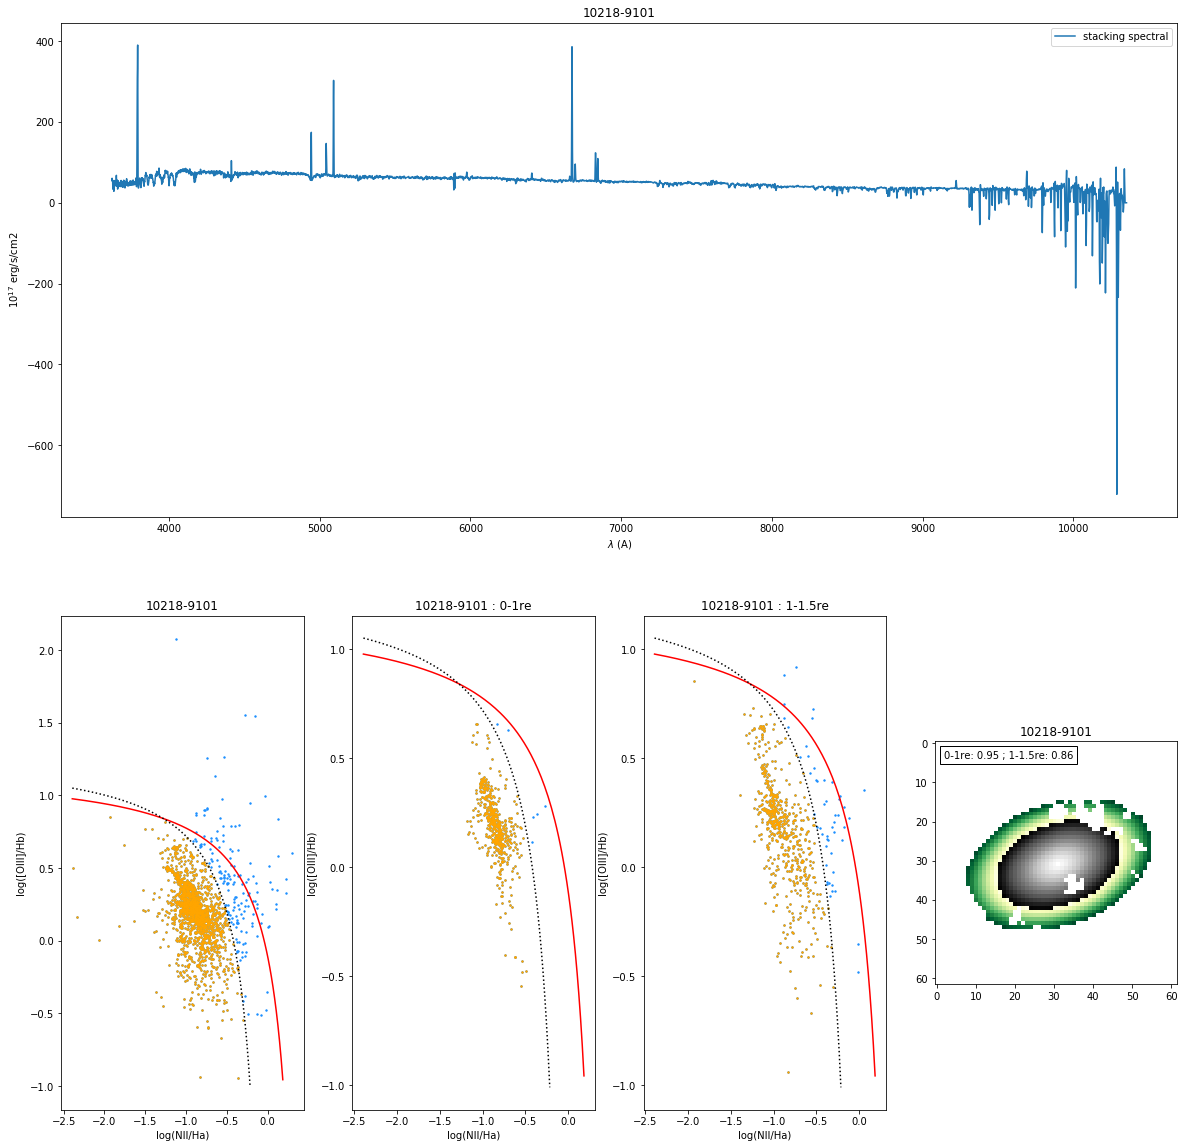

In [32]:
import os

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.offsetbox import AnchoredText
import numpy as np
from astropy.io import fits
from astropy.table import Table

np.seterr(divide='ignore', invalid='ignore')
plt.rcParams.update({'figure.max_open_warning': 0})

###############################################################################################
dir_stack = '/Users/astro/Documents/notebooks/zs/pair-m-z/stacking/'
dir_drp = '/Users/astro/Documents/notebooks/manga/spectro/analysis/MPL-8/drpall-v2_5_3.fits'
dir_dap = '/Users/astro/Documents/notebooks/manga/spectro/analysis/MPL-8/HYB10-MILESHC-MILESHC/'
dir_res = '/Users/astro/Documents/notebooks/zs/pair-m-z/bpt/'
###############################################################################################


def plot(wave, flux, nii, ha, oiii, hb, ellcoo, i):

    plt.figure(figsize=(20, 20))
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(245)
    ax3 = plt.subplot(246)
    ax4 = plt.subplot(247)
    ax5 = plt.subplot(248)

    x = np.log10(nii/ha)
    y = np.log10(oiii/hb)

    ax1.plot(wave, flux, label='stacking spectral')
    ax1.set_xlabel(r"$\lambda$ (A)")
    ax1.set_ylabel(r'$10^{17}$ erg/s/cm2')
    ax1.set_title(i)
    ax1.legend()

    # bpt line
    x_bpt = np.arange(np.min(x)-0.01, 0.2, 0.02)
    y_bpt = 0.61/(x_bpt-0.47)+1.19
    x_bpt1 = np.arange(np.min(x)-0.01, -0.2, 0.02)
    y_bpt1 = 0.61/(x_bpt1-0.05)+1.3
    ax2.plot(x_bpt, y_bpt, 'r')
    ax2.plot(x_bpt1, y_bpt1, 'k:')

    mask_sf = (y < (0.61/(x-0.05)+1.3)) & (x <
                                           0.05) & (y < (0.61/(x-0.47)+1.19))
    x_sf = x[mask_sf]
    y_sf = y[mask_sf]
    ax2.scatter(x, y, color='dodgerblue', s=2)
    ax2.scatter(x_sf, y_sf, color='orange', s=2)
    ax2.set_xlabel('log(NII/Ha)')
    ax2.set_ylabel('log([OIII]/Hb)')
    ax2.set_title(i)

    # 0-1re
    mask_0_1re = (ellcoo <= 1)

    nii_1re = nii[mask_0_1re]
    ha_1re = ha[mask_0_1re]
    oiii_1re = oiii[mask_0_1re]
    hb_1re = hb[mask_0_1re]
    x_1re = np.log10(nii_1re/ha_1re)
    y_1re = np.log10(oiii_1re/hb_1re)
    mask_sf_1re = (y_1re < (0.61/(x_1re-0.05)+1.3)) & (x_1re <
                                                       0.05) & (y_1re < (0.61/(x_1re-0.47)+1.19))
    x_sf_1re = x_1re[mask_sf_1re]
    y_sf_1re = y_1re[mask_sf_1re]
    ax3.scatter(x_1re, y_1re, color='dodgerblue', s=2)
    ax3.scatter(x_sf_1re, y_sf_1re, color='orange', s=2, label='sf')
    ax3.plot(x_bpt, y_bpt, 'r')
    ax3.plot(x_bpt1, y_bpt1, 'k:')
#     ax3.set_xlim(np.min(x_1re)-0.02, np.max(x_1re)+0.04)
    ax3.set_xlabel('log(NII/Ha)')
    ax3.set_ylabel('log([OIII]/Hb)')
    ax3.set_title('%s : 0-1re' % i)

    # 1-1.5re
    mask_1_15re = (ellcoo <= 1.5) & (ellcoo > 1)
    nii_1_15re = nii[mask_1_15re]
    ha_1_15re = ha[mask_1_15re]
    oiii_1_15re = oiii[mask_1_15re]
    hb_1_15re = hb[mask_1_15re]
    x_1_15re = np.log10(nii_1_15re/ha_1_15re)
    y_1_15re = np.log10(oiii_1_15re/hb_1_15re)
    mask_sf_1_15re = (y_1_15re < (0.61/(x_1_15re-0.05)+1.3)
                      ) & (x_1_15re < 0.05) & (y_1_15re < (0.61/(x_1_15re-0.47)+1.19))
    x_sf_1_15re = x_1_15re[mask_sf_1_15re]
    y_sf_1_15re = y_1_15re[mask_sf_1_15re]
    ax4.scatter(x_1_15re, y_1_15re, color='dodgerblue', s=2)
    ax4.scatter(x_sf_1_15re, y_sf_1_15re, color='orange', s=2, label='sf')
    ax4.plot(x_bpt, y_bpt, 'r')
    ax4.plot(x_bpt1, y_bpt1, 'k:')
#     ax4.set_xlim(np.min(x_1_15re)-0.02, np.max(x_1_15re)+0.04)
    ax4.set_xlabel('log(NII/Ha)')
    ax4.set_ylabel('log([OIII]/Hb)')
    ax4.set_title('%s : 1-1.5re' % i)
    

    
    # imshow
    
    mask_im_sf_01re=(ellcoo<1)&mask_sf
    mask_im_sf_115re=(ellcoo>1)&(ellcoo<1.5)&(mask_sf)
    
    mask_im_sf_01re_1=(1-mask_im_sf_01re).astype(np.bool)
    mask_im_sf_115re_1=(1-mask_im_sf_115re).astype(np.bool)
    
    vaild_01re=np.sum(mask_im_sf_01re)/np.sum(mask_0_1re)
    vaild_115re=np.sum(mask_im_sf_115re)/np.sum(mask_1_15re)
    
    ax5.imshow(np.ma.array(ellcoo,mask=mask_im_sf_01re_1),cmap=cm.Greys)
    ax5.imshow(np.ma.array(ellcoo,mask=mask_im_sf_115re_1),cmap=cm.YlGn)
    
    anchored_text = AnchoredText("0-1re: %.2f ; 1-1.5re: %.2f"%(vaild_01re,vaild_115re), loc=2)
    ax5.add_artist(anchored_text)
    ax5.set_title(i)
    plt.savefig(dir_res+i+'_bpt.jpg')
#     plt.show()
    plt.close()

    return mask_0_1re, mask_im_sf_01re, mask_1_15re, mask_im_sf_115re


def vaild(mask_region, mask_sf, i):

    all_num = np.sum(mask_region)
    sf_num = np.sum(mask_sf)
    return all_num, sf_num


def check_agn_remove_process():

    with fits.open(dir_drp) as f_drp:
        plateifu=f_drp[1].data.field('plateifu')
        with open(dir_res+'0-1re-vaild.txt', 'a+') as f_01re,open(dir_res+'1-1.5re-vaild.txt', 'a+') as f_115re:
            for i in plateifu:
                print(i)
                if os.path.exists(dir_stack+i+'_1re_stack.fits'):
                    print(i)
                    with fits.open(dir_stack+i+'_1re_stack.fits') as f1:

                        t = f1[1].data
                        wave = t['wave']
                        flux = t['flux']

                        plate = i.split('-')[0]
                        ifu = i.split('-')[1]

                        with fits.open(dir_dap+plate+'/'+ifu+'/manga-'+i+'-MAPS-HYB10-MILESHC-MILESHC.fits.gz') as mapf:
                            flux_map = mapf['EMLINE_GFLUX'].data
                            mask_map = mapf['EMLINE_GFLUX_MASK'].data
                            ellcoo = mapf['SPX_ELLCOO'].data[1]

                            mask = (mask_map != 0)
                            flux_map = np.ma.array(flux_map, mask=mask)

                            nii = flux_map[19]
                            ha = flux_map[18]
                            oiii = flux_map[13]
                            hb = flux_map[11]
                            ###############################
                            mask_0_1re, mask_sf_1re, mask_1_15re, mask_sf_1_15re = plot(
                                wave, flux, nii, ha, oiii, hb, ellcoo, i)

                            all_01, sf_01 = vaild(mask_0_1re, mask_sf_1re, i)
                            all_115, sf_115 = vaild(mask_1_15re, mask_sf_1_15re, i)

                            if sf_01/all_01>0.3:
                                print(i,file=f_01re)
                            if sf_115/all_115>0.3:
                                print(i,file=f_115re)




if __name__ == '__main__':
    check_agn_remove_process()

In [1]:
a=2

def num(a):
    if a >1:
        return 'a'
    else:
        return 'b'

In [3]:
num(0)

'b'

In [10]:
a=np.array([[True,False],[True,False]])
c=(1-a).astype(np.bool)
c

array([[False,  True],
       [False,  True]])